In [56]:
import pandas as pd
import numpy as np
from scipy import stats 
from scipy.stats import trim_mean


In [57]:
stores=pd.read_csv("Stores-checkpoint.csv")
stores.info()
stores.shape
stores.isnull().sum()
stores.duplicated()
stores.drop_duplicates(inplace=True)
store=stores.fillna('0')
store=stores.drop(index=66)
Q1 = store['Square Meters'].quantile(0.25)
Q3 = store['Square Meters'].quantile(0.75)
IQR = Q3 - Q1
store_iq = store[(store['Square Meters'] >= (Q1 - 1.5 * IQR)) & (store['Square Meters'] <= (Q3 + 1.5 * IQR))]
store_iq['z_score'] = np.abs(stats.zscore(store_iq['Square Meters']))
store_iq['z_score']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StoreKey       67 non-null     int64  
 1   Country        67 non-null     object 
 2   State          67 non-null     object 
 3   Square Meters  66 non-null     float64
 4   Open Date      67 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.7+ KB


0     1.411132
1     1.288759
2     1.045072
3     1.045072
4     1.045072
        ...   
61    0.493333
62    1.045072
63    0.126214
64    0.669212
65    0.982826
Name: z_score, Length: 66, dtype: float64

In [58]:
trimmed_mean_store=trim_mean(store['Square Meters'],proportiontocut=0.1)
trimmed_mean_store

1446.0185185185185

In [32]:
#sort_square_meter= store_iq.sort_values(by='Square Meters', ascending=True).reset_index(drop=True)

In [59]:
sale=pd.read_csv('Sales-checkpoint.csv')
sale.info()
sale.describe()
sale.columns
sale.isnull().sum()
sale['Delivery Date'].fillna('0', inplace=True)
import datetime
sale['Delivery Date']=pd.to_datetime(sale['Delivery Date'],errors='coerce')
sale['Delivery Date'].duplicated()
sale=sale.rename(columns={'Currency Code':'Currency'})
store_sale=pd.merge(store_iq,sale, on='StoreKey')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order Number   62884 non-null  int64 
 1   Line Item      62884 non-null  int64 
 2   Order Date     62884 non-null  object
 3   Delivery Date  13165 non-null  object
 4   CustomerKey    62884 non-null  int64 
 5   StoreKey       62884 non-null  int64 
 6   ProductKey     62884 non-null  int64 
 7   Quantity       62884 non-null  int64 
 8   Currency Code  62884 non-null  object
dtypes: int64(6), object(3)
memory usage: 4.3+ MB


C:\Users\Welcome\AppData\Local\Temp\ipykernel_18384\3527357866.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sale['Delivery Date'].fillna('0', inplace=True)
C:\Users\Welcome\AppData\Local\Temp\ipykernel_18384\3527357866.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sale['Delivery Date']=pd.to_datetime(sale['Delivery Date'],errors='coerce')


In [51]:
#store_sale

In [60]:
product=pd.read_csv('products-checkpoint.csv')
product.head()
product.info()
product['Unit Price USD']=product['Unit Price USD'].replace('[\$,]', '', regex=True).astype(float)
product['Unit Cost USD']=product['Unit Cost USD'].replace('[\$,]', '', regex=True).astype(float)
product.info()
product.describe()
product.isnull().sum()
product.drop_duplicates()
store_sale_product=pd.merge(store_sale,product,on='ProductKey')


<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Welcome\AppData\Local\Temp\ipykernel_18384\2338921198.py:4: SyntaxWarning: invalid escape sequence '\$'
  product['Unit Price USD']=product['Unit Price USD'].replace('[\$,]', '', regex=True).astype(float)
C:\Users\Welcome\AppData\Local\Temp\ipykernel_18384\2338921198.py:5: SyntaxWarning: invalid escape sequence '\$'
  product['Unit Cost USD']=product['Unit Cost USD'].replace('[\$,]', '', regex=True).astype(float)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductKey      2517 non-null   int64 
 1   Product Name    2517 non-null   object
 2   Brand           2517 non-null   object
 3   Color           2517 non-null   object
 4   Unit Cost USD   2517 non-null   object
 5   Unit Price USD  2517 non-null   object
 6   SubcategoryKey  2517 non-null   int64 
 7   Subcategory     2517 non-null   object
 8   CategoryKey     2517 non-null   int64 
 9   Category        2517 non-null   object
dtypes: int64(3), object(7)
memory usage: 196.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ProductKey      2517 non-null   int64  
 1   Product Name    2517 non-null   object 
 2   Brand           2517 

In [61]:
product['Unit Price USD']=product['Unit Price USD'].replace('[\$,]', '', regex=True).astype(float)
product['Unit Cost USD']=product['Unit Cost USD'].replace('[\$,]', '', regex=True).astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Welcome\AppData\Local\Temp\ipykernel_18384\2585730537.py:1: SyntaxWarning: invalid escape sequence '\$'
  product['Unit Price USD']=product['Unit Price USD'].replace('[\$,]', '', regex=True).astype(float)
C:\Users\Welcome\AppData\Local\Temp\ipykernel_18384\2585730537.py:2: SyntaxWarning: invalid escape sequence '\$'
  product['Unit Cost USD']=product['Unit Cost USD'].replace('[\$,]', '', regex=True).astype(float)


In [62]:
customer = pd.read_csv('C:\\Users\\Welcome\\dark spark mini 2\\Customers.csv',encoding='ISO-8859-1')
customer.head()
customer.dtypes
customer.isnull().sum()
customer['Birthday']=pd.to_datetime(customer['Birthday'])
today = pd.to_datetime("today") 
customer['age'] = (today.year - customer['Birthday'].dt.year)
customer.dtypes
customer['State Code'].fillna('NotEntered',inplace=True)
customer.isnull().sum()
customer['age'].min()
customer['age'].max()
store_sale_prod_cust=pd.merge(store_sale_product,customer,on=['CustomerKey','Country','State'])

C:\Users\Welcome\AppData\Local\Temp\ipykernel_18384\170048668.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer['State Code'].fillna('NotEntered',inplace=True)


In [63]:
exchange=pd.read_csv('Exchange_Rates-checkpoint.csv')
exchange.head()
store_sale_prod_cust=pd.merge(store_sale_prod_cust,exchange,on='Currency')


MemoryError: Unable to allocate 423. MiB for an array with shape (4, 13863983) and data type float64

In [28]:
store_sale_prod_cust.isnull().sum()

StoreKey          0
Country           0
State             0
Square Meters     0
Open Date         0
z_score           0
Order Number      0
Line Item         0
Order Date        0
Delivery Date     0
CustomerKey       0
ProductKey        0
Quantity          0
Currency          0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
Gender            0
Name              0
City              0
State Code        0
Zip Code          0
Continent         0
Birthday          0
age               0
Date              0
Exchange          0
dtype: int64

In [31]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
pip install seaborn


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
from matplotlib.legend import Legend

In [34]:
# EDA process

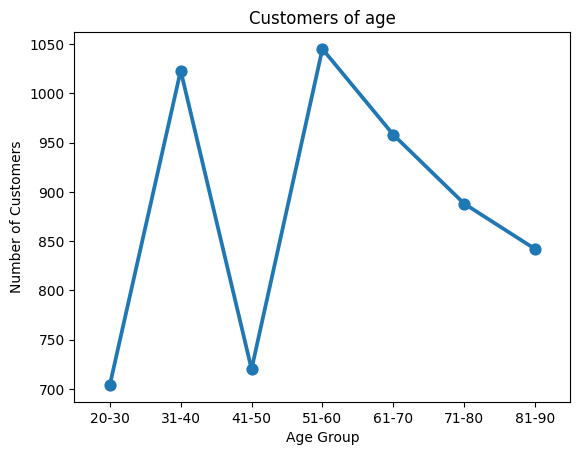

In [35]:
age_groups = pd.cut(store_sale_prod_cust['age'], bins=[22, 29, 39, 49, 59, 69,79,89], labels=["20-30","31-40","41-50","51-60","61-70","71-80","81-90"])
age_dist = age_groups.value_counts()
sns.pointplot(x=age_dist.index, y=age_dist.values)
plt.title("Customers of age")
plt.xlabel("Age Group")
plt.ylabel("Number of Customers")
plt.show()

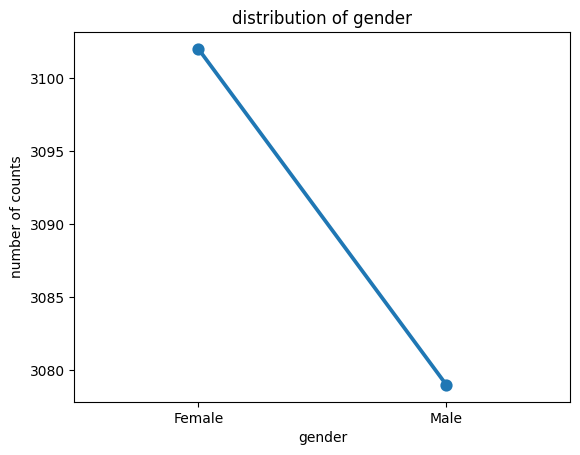

In [36]:
groupOfGender=store_sale_prod_cust['Gender']
gender_count=groupOfGender.value_counts().sort_index()
sns.pointplot(x=gender_count.index,y=gender_count.values)
plt.title('distribution of gender')
plt.xlabel('gender')
plt.ylabel('number of counts')
plt.show()

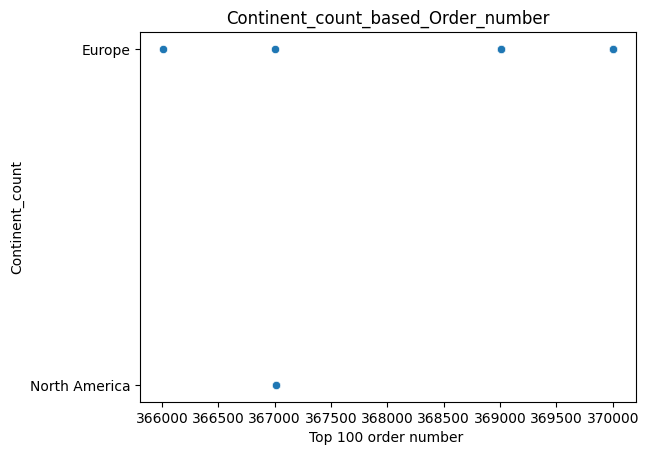

In [37]:
continent_count=store_sale_prod_cust.sort_values('Order Number',ascending=True).reset_index()
sns.scatterplot(data=continent_count[:10],x='Order Number',y='Continent')
plt.title('Continent_count_based_Order_number')
plt.xlabel('Top 100 order number ')
plt.ylabel('Continent_count')
plt.show()

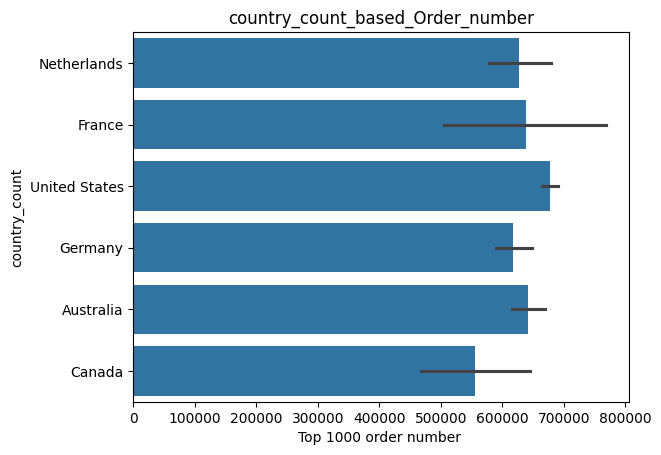

In [38]:
country_count=store_sale_prod_cust.sort_values('Order Number',ascending=True).reset_index()
sns.barplot(data=country_count[:1000],x='Order Number',y='Country')
plt.title('country_count_based_Order_number')
plt.xlabel('Top 1000 order number ')
plt.ylabel('country_count')
plt.show()

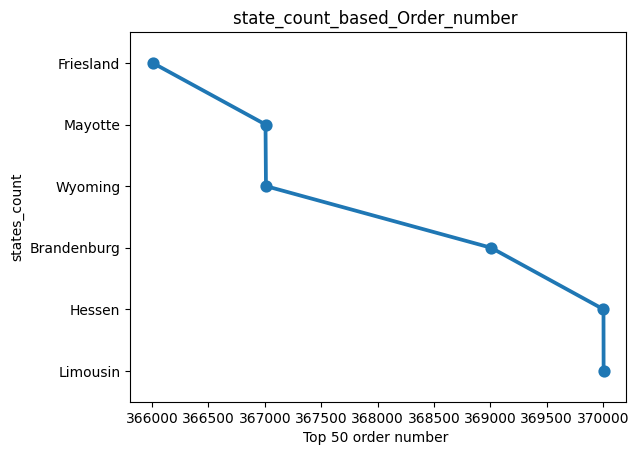

In [39]:
state_count=store_sale_prod_cust.sort_values('Order Number',ascending=True).reset_index()
sns.pointplot(data=state_count[:10],x='Order Number',y='State')
plt.title('state_count_based_Order_number ')
plt.xlabel('Top 50 order number ')
plt.ylabel('states_count')
plt.show()

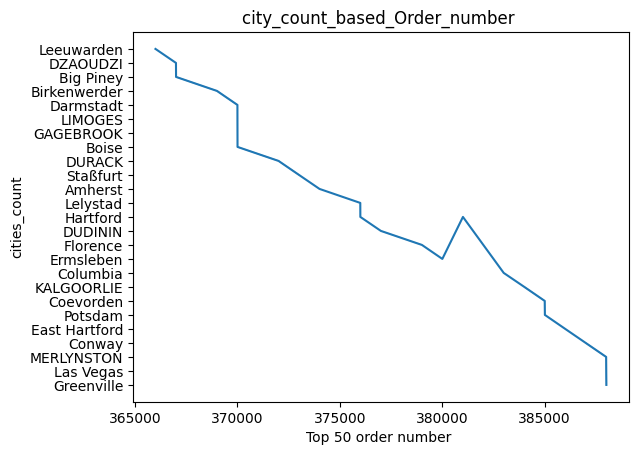

In [40]:
cities_count=store_sale_prod_cust.sort_values('Order Number',ascending=True).reset_index()
sns.lineplot(data=cities_count[:50],x='Order Number',y='City')
plt.title('city_count_based_Order_number ')
plt.xlabel('Top 50 order number ')
plt.ylabel('cities_count')
plt.show()

In [41]:
value=store_sale_prod_cust['Order Number'].mean()
value

1450293.9037372593

<function matplotlib.pyplot.show(close=None, block=None)>

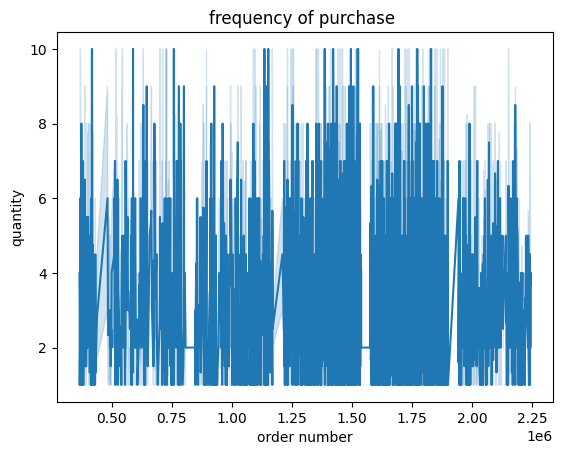

In [42]:
sns.lineplot(x='Order Number',y='Quantity',data=store_sale_prod_cust)
plt.title('frequency of purchase ')
plt.xlabel('order number')
plt.ylabel('quantity')
plt.show

In [43]:
store_sale_prod_cust['Order Date'] = pd.to_datetime(store_sale_prod_cust['Order Date'])

<Axes: xlabel='Unit Price USD', ylabel='Open Date'>

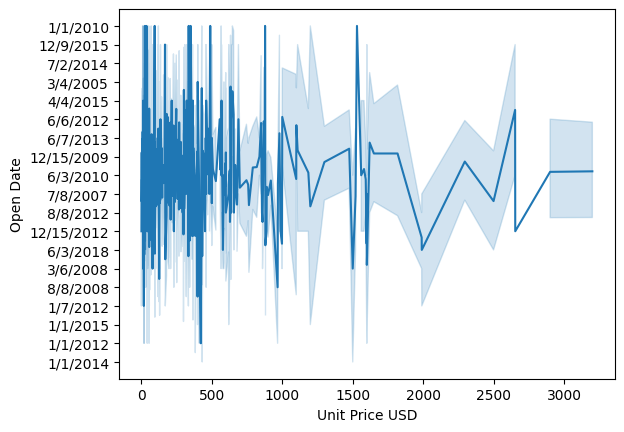

In [44]:
#sales analysis
#Overall Sales Performance: Analyze total sales over time, identifying trends and seasonality
sns.lineplot(x='Unit Price USD',y='Open Date',data=store_sale_prod_cust)

<Axes: xlabel='Quantity', ylabel='Product Name'>

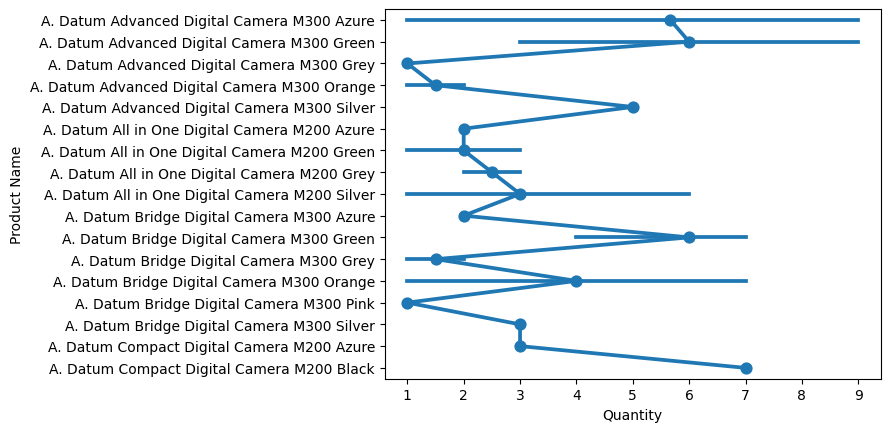

In [45]:
#Sales by Product: Evaluate which products are the top performers in terms of quantity sold and revenue generated.
store_sale_prod_cust= store_sale_prod_cust.sort_values('Product Name',ascending=True).head(30)
sns.pointplot(x='Quantity',y='Product Name',data=store_sale_prod_cust)

<function matplotlib.pyplot.show(close=None, block=None)>

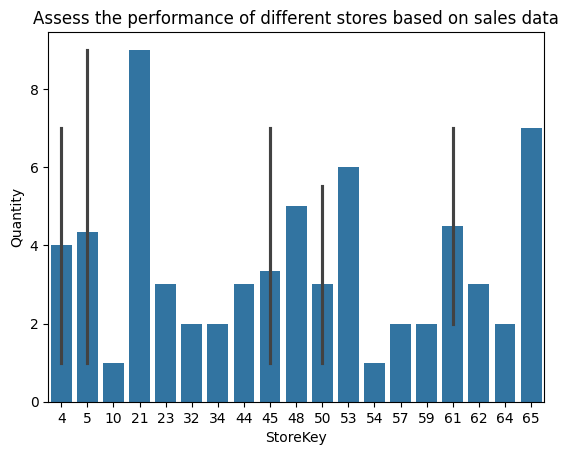

In [46]:
#Sales by Store: Assess the performance of different stores based on sales data.
sns.barplot(x='StoreKey',y='Quantity',data=store_sale_prod_cust)
plt.title('Assess the performance of different stores based on sales data')
plt.xlabel('StoreKey')
plt.ylabel('Quantity')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

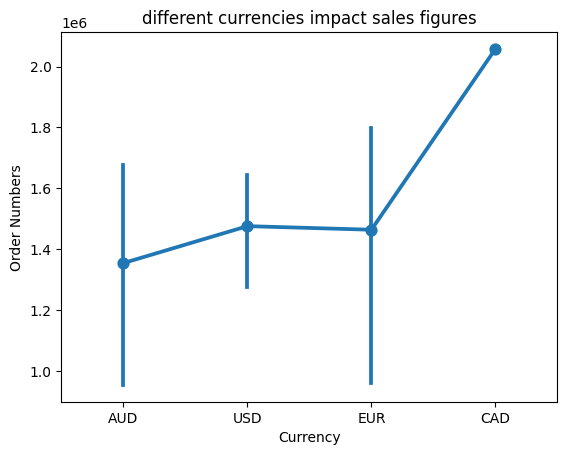

In [47]:
#Sales by Currency: Examine how different currencies impact sales figures, considering exchange rates.
sns.pointplot(x='Currency',y='Order Number',data= store_sale_prod_cust)
plt.title('different currencies impact sales figures')
plt.xlabel('Currency')
plt.ylabel('Order Numbers')
plt.show

Text(0, 0.5, 'products')

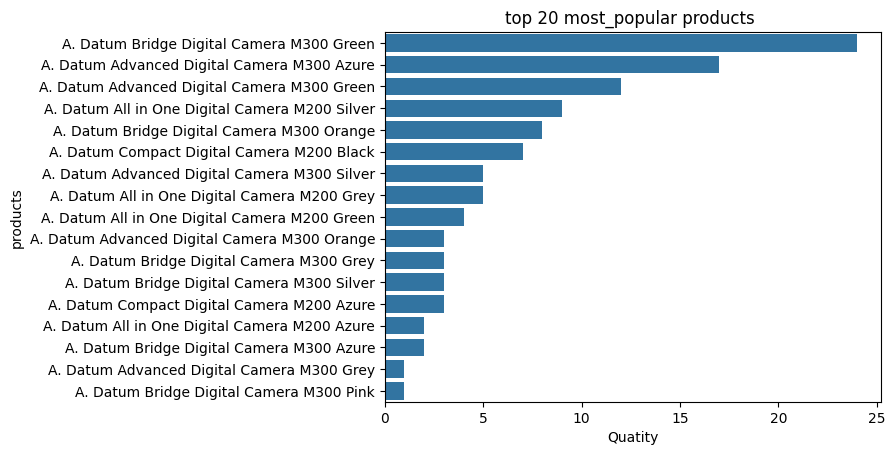

In [48]:
#Product Popularity: Identify the most and least popular products based on sales data.
product_sales = store_sale_prod_cust.groupby('Product Name')['Quantity'].sum()

most_popular = product_sales.sort_values(ascending=False).head(20)  
least_popular = product_sales.sort_values(ascending=True).head(20)

sns.barplot(x=most_popular.values,y=most_popular.index)
plt.title('top 20 most_popular products ')
plt.xlabel('Quatity')
plt.ylabel('products')

Text(0, 0.5, 'products')

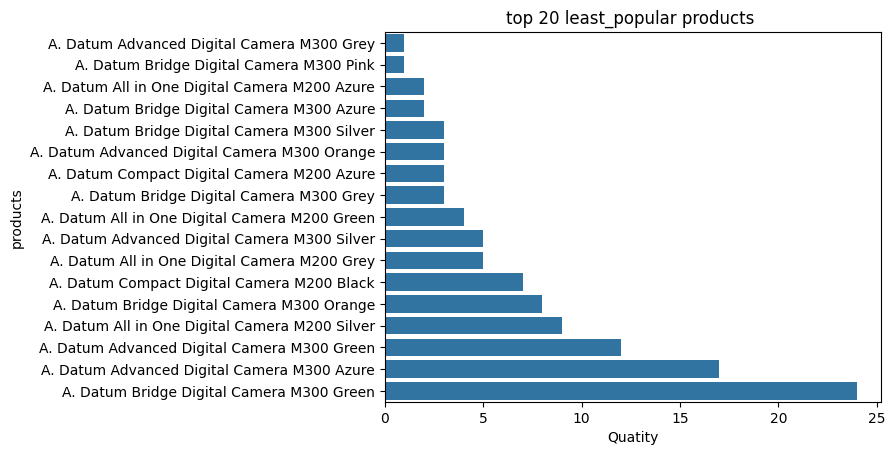

In [49]:
sns.barplot(x=least_popular.values,y=least_popular.index)
plt.title('top 20 least_popular products ')
plt.xlabel('Quatity')
plt.ylabel('products')

<function matplotlib.pyplot.show(close=None, block=None)>

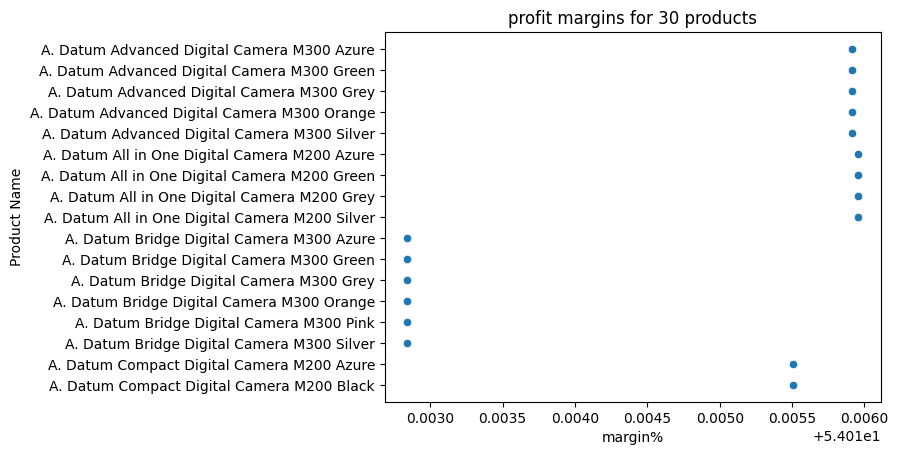

In [50]:
#Profitability Analysis: Calculate profit margins for products by comparing unit cost and unit price.
store_sale_prod_cust['profit_margin%']=(store_sale_prod_cust['Unit Price USD']-store_sale_prod_cust['Unit Cost USD'])/store_sale_prod_cust['Unit Price USD']*100
product=store_sale_prod_cust.sort_values('Product Name',ascending=True).head(30)
sns.scatterplot(x='profit_margin%',y='Product Name',data=product)
plt.title('profit margins for 30 products')
plt.xlabel('margin%')
plt.ylabel('Product Name')
plt.show

<Axes: ylabel='None'>

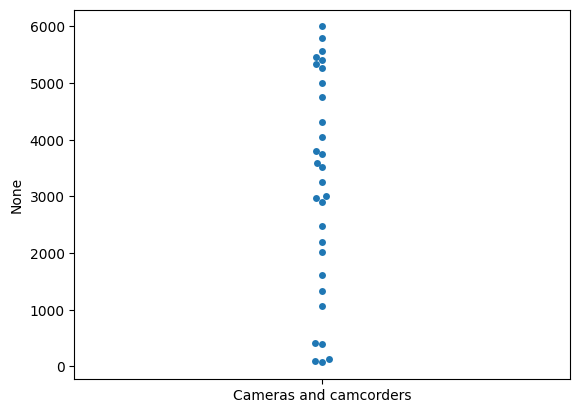

In [51]:
#Category Analysis: Analyze sales performance across different product categories and subcategories.
store_sale_prod_cust['Product Name'].unique()
cate=store_sale_prod_cust['Category']
sub_cate=store_sale_prod_cust['Subcategory']
sns.swarmplot(data=store_sale_prod_cust,x=cate.values,y=cate.index)

<Axes: xlabel='StoreKey', ylabel='Quantity'>

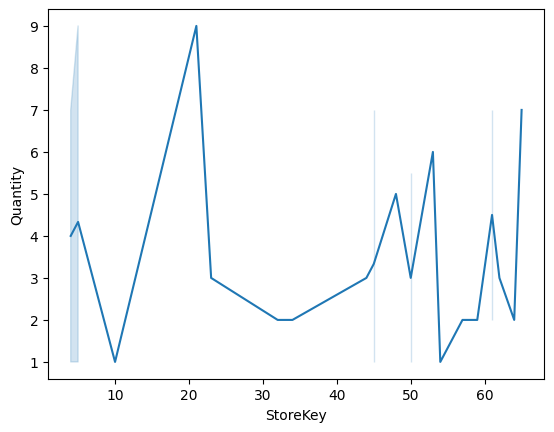

In [52]:
#Store Performance: Evaluate store performance based on sales, size (square meters), and operational data (open date).
sns.lineplot(x='StoreKey',y='Quantity',data=store_sale_prod_cust)

<Axes: xlabel='StoreKey', ylabel='Square Meters'>

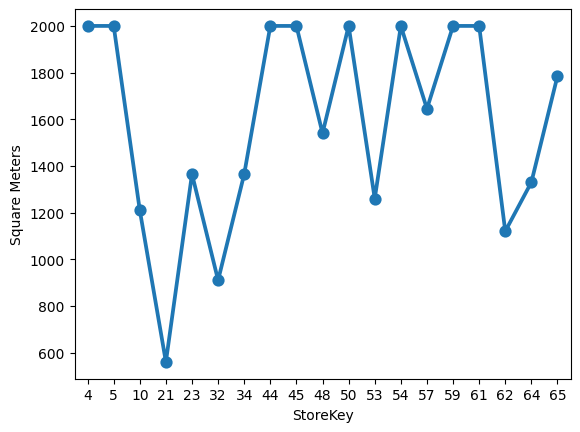

In [53]:
sns.pointplot(x='StoreKey',y='Square Meters',data=store_sale_prod_cust)

<Axes: xlabel='StoreKey', ylabel='Open Date'>

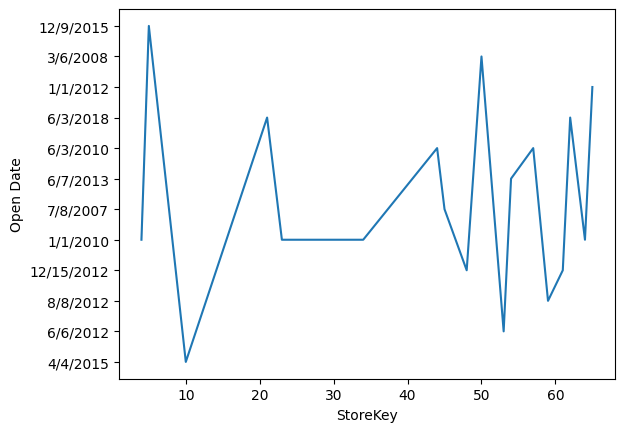

In [54]:
sns.lineplot(x='StoreKey',y='Open Date',data=store_sale_prod_cust)

<Axes: xlabel='Quantity', ylabel='State'>

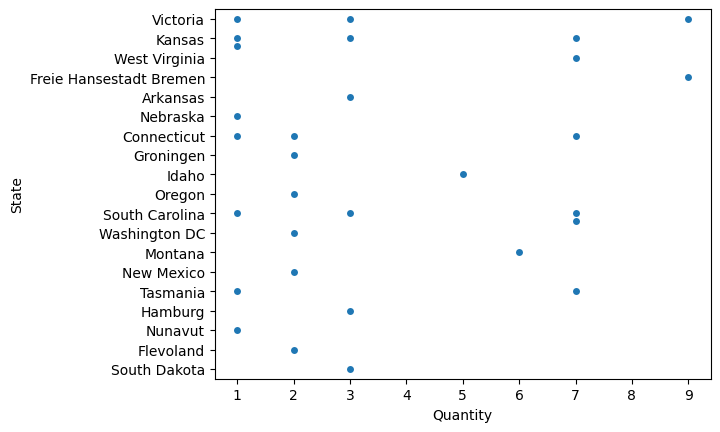

In [55]:
#Geographical Analysis: Analyze sales by store location to identify high-performing regions.
sns.swarmplot(x='Quantity',y='State',data=store_sale_prod_cust)

In [56]:
pip install mysql-connector-python


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
pip install pymysql

   ---------------------------------------- 0.0/45.0 kB ? eta -:--:--
   ------------------------------------ --- 41.0/45.0 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 45.0/45.0 kB 560.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pymysql

In [3]:
mydb = pymysql.connect(
  host="localhost",
  user="root",
  password="Prem&11243"
)


In [4]:
print(mydb)

In [5]:
mycursor = mydb.cursor()

In [6]:
mycursor.execute("CREATE DATABASE mydatabase")

1

In [31]:
store_sale_prod_cust.columns

Index(['StoreKey', 'Country', 'State', 'Square Meters', 'Open Date', 'z_score',
       'Order Number', 'Line Item', 'Order Date', 'Delivery Date',
       'CustomerKey', 'ProductKey', 'Quantity', 'Currency', 'Product Name',
       'Brand', 'Color', 'Unit Cost USD', 'Unit Price USD', 'SubcategoryKey',
       'Subcategory', 'CategoryKey', 'Category', 'Gender', 'Name', 'City',
       'State Code', 'Zip Code', 'Continent', 'Birthday', 'age', 'Date',
       'Exchange'],
      dtype='object')